# Machine Learning - Dimension Reduction and Clustering
Steven Abreu - s.abreu@jacobs-university.de

The usual imports: numpy and pyplot. We also import a library with support for 3D plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Here are some tutorials that will be useful for anything data-related in Python:

- Pyplot: 
    - official tutorial https://matplotlib.org/tutorials/introductory/pyplot.html
    - datacamp https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
    - anatomy of matplotlib series (awesome jupyter notebooks) https://github.com/matplotlib/AnatomyOfMatplotlib
- Jupyter Notebooks: https://www.dataquest.io/blog/jupyter-notebook-tutorial/

## Loading the dataset

We will be working with the "Iris" dataset. This is one of the most famous datasets in pattern recognition. It consists of 150 patterns, representing intances of the iris plant. Each pattern is represented by a four dimensional feature vector consisting of the sepal length, sepal width, petal length and petal width.

- Patterns: $(x_i)_{i=1,..,150}$ with $x_i \in \mathbb{R}^{4}$
- Labels: $(y_i)_{i=1,..,150}$ with $y_i \in \mathbb{R}$

We import this dataset from the scikit-learn Python library.

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [4]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [5]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Inspecting the dataset

We use the seaborn library to plot a so-called "pair plot". This shows pair-wise relationships within a dataset, as well as histograms (on the diagonal). We color code the different species in this plot. 

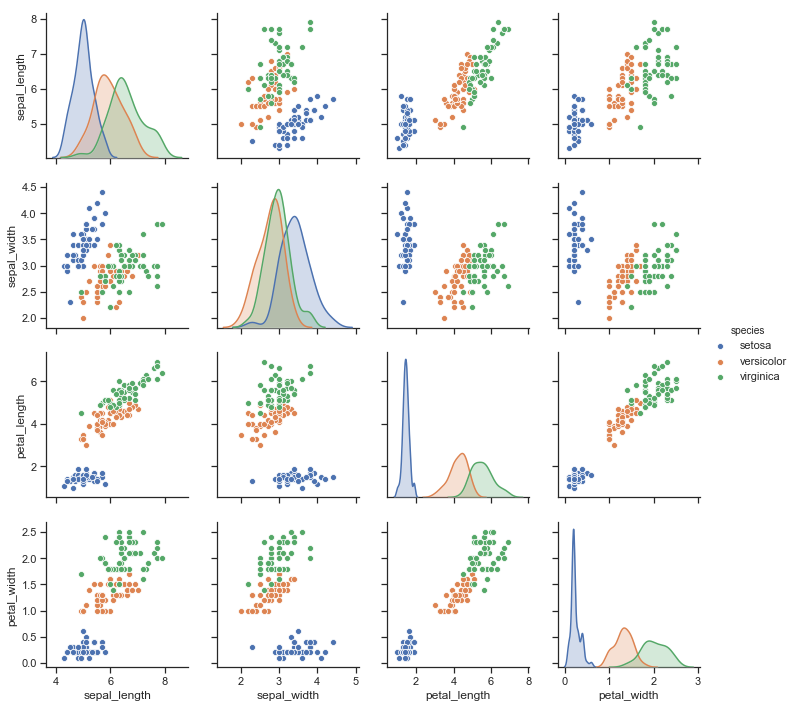

In [6]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sns.load_dataset("iris"), hue="species")

## Dimensionality Reduction

### PCA

We use the PCA function from the sklearn (scikit-learn) library in Python. This is one of the most widely used ML libraries in Python with support for most well-known ML algorithms.

In [7]:
from sklearn.decomposition import PCA

Turning each pattern $x_i \in \mathbb{R}^4$ into $x_i' \in \mathbb{R}^3$

In [8]:
X_reduced3 = PCA(n_components=3).fit_transform(iris.data)

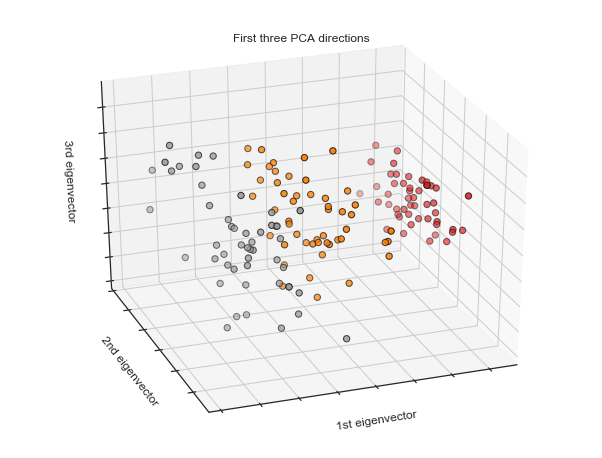

In [9]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [10]:
X_reduced2 = PCA(n_components=2).fit_transform(iris.data)

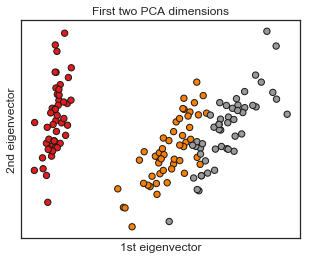

In [11]:
plt.rcParams['figure.figsize'] = [5,4]
plt.title('First two PCA dimensions')
plt.scatter(X_reduced2[:,0], X_reduced2[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

In [12]:
X_reduced = PCA(n_components=1).fit_transform(iris.data)

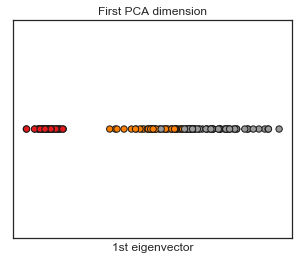

In [13]:
plt.rcParams['figure.figsize'] = [5,4]
plt.title('First PCA dimension')
plt.scatter(X_reduced[:,0], np.ones_like(X_reduced[:,0]), c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])
plt.xlabel('1st eigenvector')
plt.show()

### Other dimensionality reduction algorithms

#### Isomap

Isomap stands for isometric mapping. Isomap is a non-linear dimensionality reduction method based which tries to preserve the distances between patterns in lower dimensions. 

Isomap starts by creating a neighborhood network. After that, it uses graph distance to the approximate distance between all pairs of points. With these distances, it tries to find a low dimensional embedding of the dataset.

In [14]:
from sklearn.manifold import Isomap

In [15]:
X_reduced_isomap = Isomap(n_components=3).fit_transform(X)

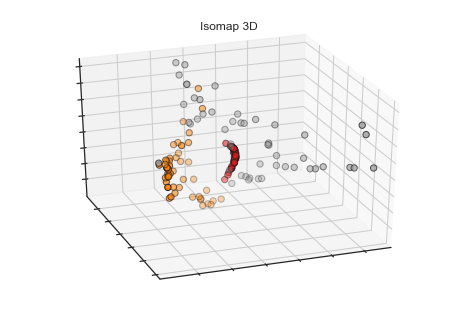

In [16]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], X_reduced_isomap[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Isomap 3D")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [17]:
X_reduced_isomap = Isomap(n_components=2).fit_transform(X)

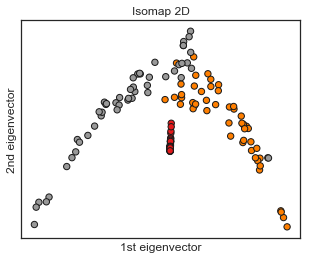

In [18]:
plt.rcParams['figure.figsize'] = [5,4]
plt.title('Isomap 2D')
plt.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

#### t-SNE

PCA is a linear projection, thus it can't capture any non-linear dependencies in your data.

t-SNE tries to capture more complex relationships between the patterns (at which even PCA fails). More specifically, it doesn't just detect linear relationships within the data but also captures non-linear structures. It takes significantly longer than PCA to run.

Read up on t-SNE: https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/.

In [19]:
from sklearn.manifold import TSNE

In [20]:
X_reduced_tsne = TSNE(n_components=3).fit_transform(X)

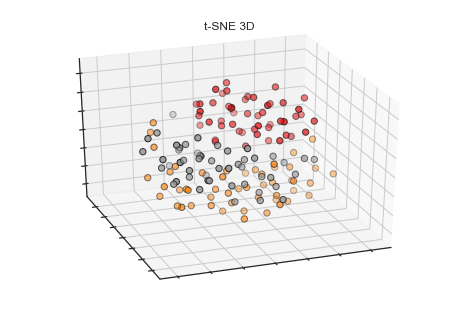

In [21]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], X_reduced_tsne[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("t-SNE 3D")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [22]:
X_reduced_tsne = TSNE(n_components=2).fit_transform(X)

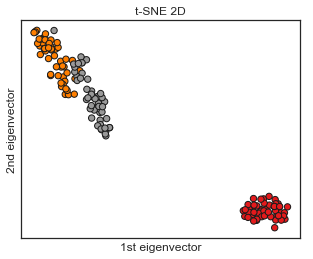

In [23]:
plt.title('t-SNE 2D')
plt.rcParams['figure.figsize'] = [5,4]
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

#### Overview of dimension reduction algorithms in 2D

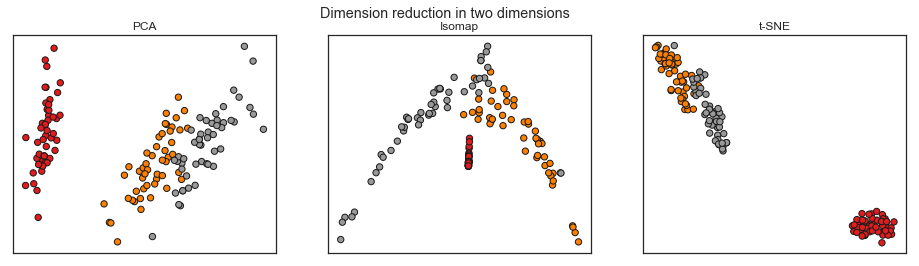

In [24]:
plt.rcParams['figure.figsize'] = [16,4]
plt.suptitle('Dimension reduction in two dimensions')

plt.subplot(1,3,1)
plt.title('PCA')
plt.scatter(X_reduced2[:,0], X_reduced2[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title('Isomap')
plt.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title('t-SNE')
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xticks([])
plt.yticks([])
plt.show()

## Clustering

### K-Means

We use the K-Means clustering algorithm from the sklearn library in Python.

In [25]:
from sklearn.cluster import KMeans

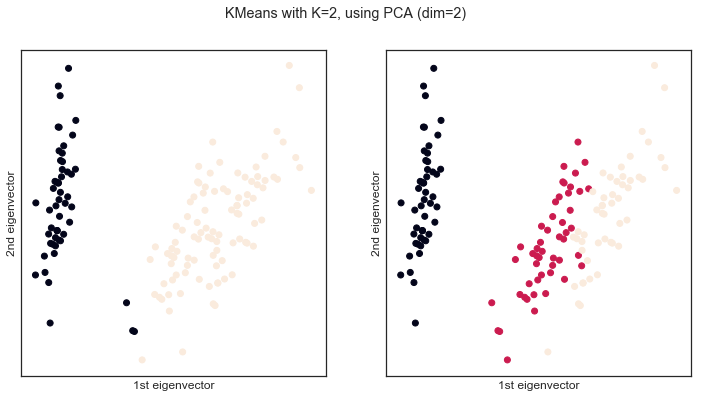

In [26]:
random_state = 170
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.rcParams['figure.figsize'] = [12,6]
plt.suptitle('KMeans with K=2, using PCA (dim=2)')

plt.subplot(1,2,1)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_pred)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.xticks([])
plt.yticks([])
plt.show()

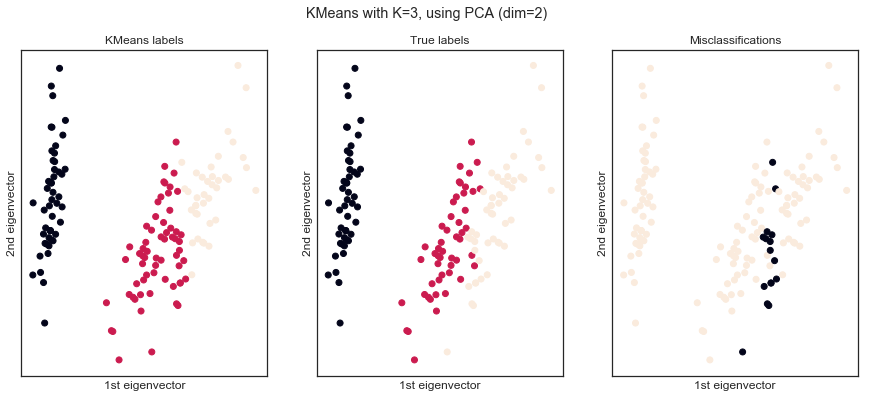

Cluster accuracy for class prediction: 89.33%


In [27]:
random_state = 170
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.rcParams['figure.figsize'] = [15,6]
plt.suptitle('KMeans with K=3, using PCA (dim=2)')

plt.subplot(1,3,1)
plt.title('KMeans labels')
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_pred)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title('True labels')
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title('Misclassifications')
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=(y==y_pred))
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.xticks([])
plt.yticks([])
plt.show()

print('Cluster accuracy for class prediction: {:.2%}'.format(np.count_nonzero(y_pred == y) / y.shape[0]))

## Extra: Eigenfaces

In this section, we will be using PCA to create so-called "eigenfaces" (mentioned in the lecture notes). 

See https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html# for more information.

In [28]:
from sklearn.datasets import fetch_lfw_people

In [29]:
lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.4)
# get the shapes of images arrays
n_samples, h, w = lfw_people.images.shape
# save the patterns
X = lfw_people.data
n_features = X.shape[1]
# save the target labels (id and name)
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [30]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 4324
n_features: 1850
n_classes: 158


In [31]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X)

In [32]:
eigenfaces = pca.components_.reshape((150, h, w))

In [33]:
X_pca = pca.transform(X)

In [34]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

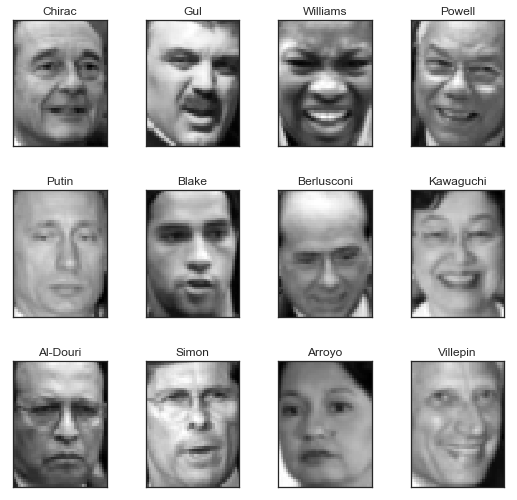

In [35]:
names = [target_names[y[i]].rsplit(' ', 1)[-1] for i in range(y_pred.shape[0])]
plot_gallery(X, names, h, w)

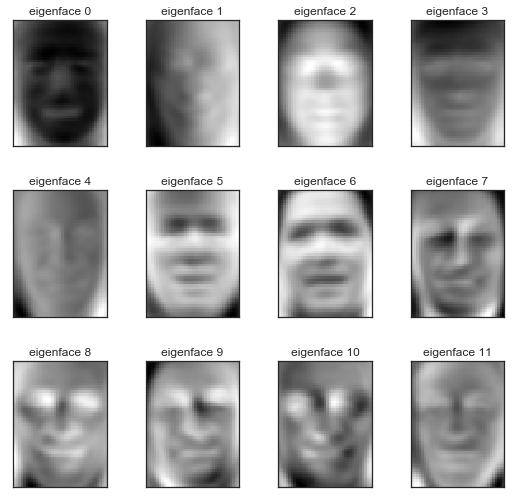

In [36]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)